# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman.

### import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from ipywidgets import interact

/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### set defaults

In [2]:
sns.set_context('poster')
sns.set_style('ticks')

### load data

In [3]:
dataset = '../data/feelingOld.csv'

In [4]:
dataset

'../data/feelingOld.csv'

In [5]:
df = pd.read_csv(dataset)

In [6]:
df.tail()

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
190,"Yes, I am at least 18 years of age, have read ...",5,50,80,23,female,1
191,"Yes, I am at least 18 years of age, have read ...",4,50,60,49,male,2
192,"Yes, I am at least 18 years of age, have read ...",3,70,100,55,female,5
193,"Yes, I am at least 18 years of age, have read ...",5,69,80,69,male,3
194,"Yes, I am at least 18 years of age, have read ...",5,40,60,41,male,0


### clean up

In [7]:
clean_df = df.drop('Consent', axis=1)
clean_df.loc[:, 'gender'] = [['male', 'female']['fem' in x.lower()]
                             for x in clean_df.loc[:, 'gender']]

In [8]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild
190,5,50,80,23,female,1
191,4,50,60,49,male,2
192,3,70,100,55,female,5
193,5,69,80,69,male,3
194,5,40,60,41,male,0


### transform

In [9]:
age_bins = list(range(10, 90, 10))
age_bins

[10, 20, 30, 40, 50, 60, 70, 80]

In [10]:
clean_df.loc[:, 'ageBin'] = pd.cut(clean_df.loc[:, 'age'], bins=age_bins)

In [11]:
clean_df.loc[:, 'oldBeginBin'] = pd.cut(
    clean_df.loc[:, 'oldBegin'], bins=age_bins)

In [12]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,ageBin,oldBeginBin
190,5,50,80,23,female,1,"(20, 30]","(40, 50]"
191,4,50,60,49,male,2,"(40, 50]","(40, 50]"
192,3,70,100,55,female,5,"(50, 60]","(60, 70]"
193,5,69,80,69,male,3,"(60, 70]","(60, 70]"
194,5,40,60,41,male,0,"(40, 50]","(30, 40]"


In [13]:
count_df = clean_df.groupby('ageBin').count()
count_df.loc[:, 'ageBin'] = count_df.index

In [14]:
count_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,oldBeginBin,ageBin
ageBin,,,,,,,,
"(30, 40]",61,61,61,61,61,61,61,"(30, 40]"
"(40, 50]",29,29,29,29,29,29,29,"(40, 50]"
"(50, 60]",22,22,22,22,22,22,22,"(50, 60]"
"(60, 70]",6,6,6,6,6,6,6,"(60, 70]"
"(70, 80]",3,3,3,3,3,3,3,"(70, 80]"


## explore

#### Descriptive Statistics

In [15]:
clean_df.describe()

,ageFeel,oldBegin,oldReally,age,numChild
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,4.025641,48.128205,67.887179,36.805128,0.933333
std,1.237040,12.600891,14.348303,12.116402,1.188721
min,1.000000,20.000000,18.000000,20.000000,0.000000
25%,3.000000,40.000000,60.000000,28.000000,0.000000
50%,4.000000,50.000000,70.000000,33.000000,0.000000
75%,5.000000,60.000000,80.000000,43.500000,2.000000
max,7.000000,80.000000,112.000000,79.000000,5.000000


In [16]:
sns.set_context('paper')

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


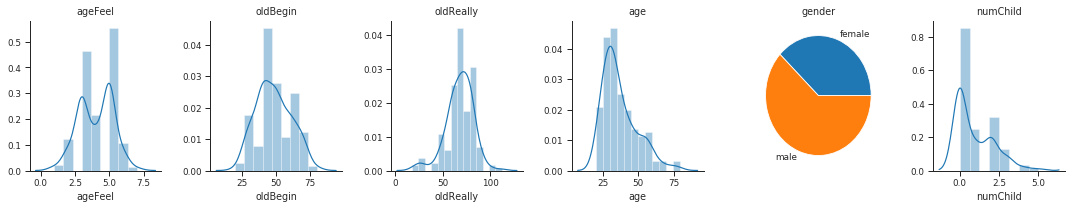

In [17]:
fig = plt.figure(figsize=(20,3))
n_columns = clean_df.columns.shape[-1]
for i,c in enumerate(clean_df.columns[:-2]):
    ax = plt.subplot(1,n_columns,i+1)
    try:
        sns.distplot(clean_df.loc[:,c],ax=ax)
        ax.set_title(c)
        sns.despine()
    except:
        this_df = clean_df.groupby(c).count().mode(axis=1)
        ax.pie(this_df,labels=this_df.index)
        ax.set_title(c)

plt.tight_layout()
plt.show()

In [18]:
sns.set_context('poster')

#### number of cases per age group

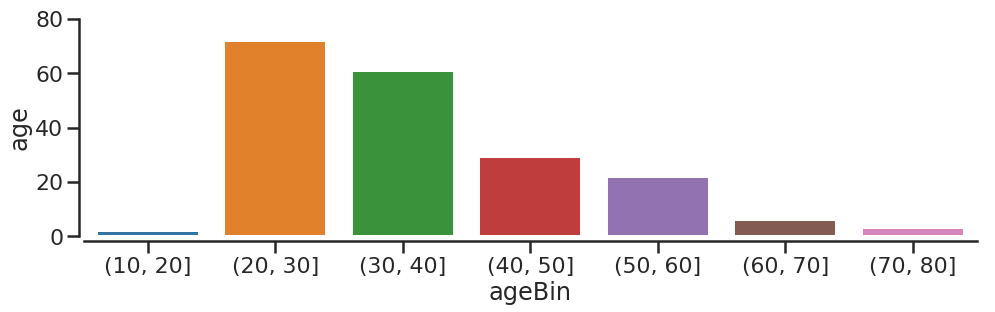

In [19]:
plt.figure(figsize=(16, 4))
sns.barplot(data=count_df, x='ageBin', y='age')
sns.despine(offset=5)
plt.ylim(0, 80)
plt.show()

### split by gender

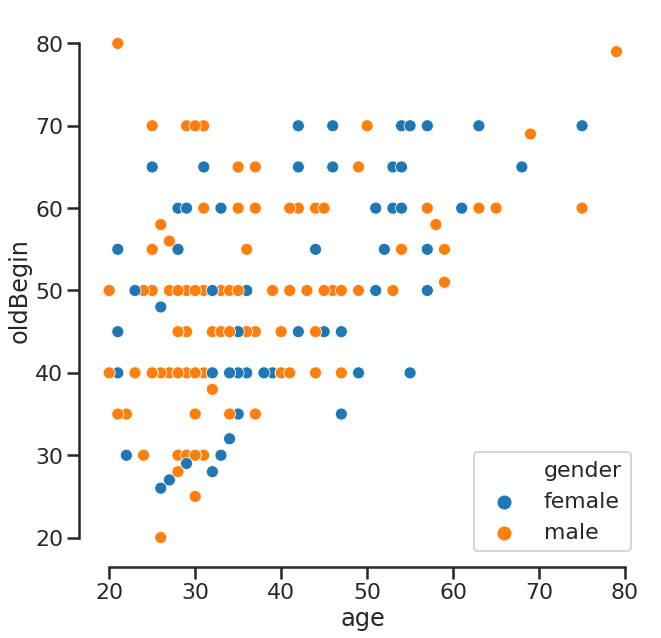

In [20]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=clean_df, x='age', y='oldBegin', hue='gender')
sns.despine(trim=True, offset=5)
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


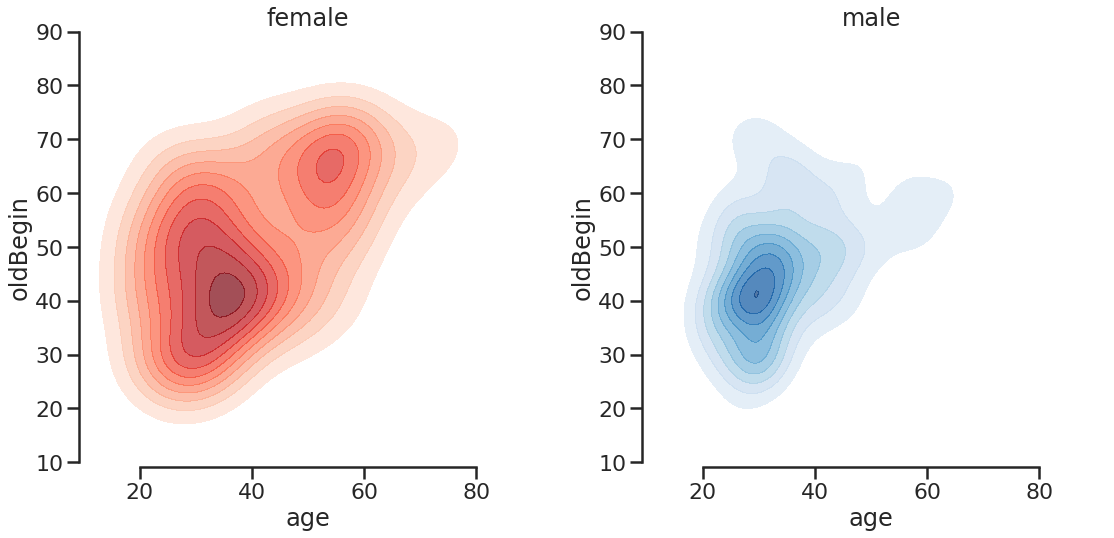

In [21]:
fig = plt.figure(figsize=(16, 8))

for i, g in enumerate(['female', 'male']):
    ax = plt.subplot(1, 2, i + 1)
    this_df = clean_df[clean_df.loc[:, 'gender'] == g]
    sns.kdeplot(
        this_df.loc[:, 'age'],
        this_df.loc[:, 'oldBegin'],
        cmap={
            'female': 'Reds',
            'male': 'Blues'
        }[g],
        shade=True,
        shade_lowest=False,
        alpha=0.7,
        label=g,
        ax=ax)
    ax.set_xlim(10, 90)
    ax.set_ylim(10, 90)
    ax.set_title(g)
    sns.despine(trim=True, offset=5)
plt.tight_layout()
plt.show()

### age ratings for different groups

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


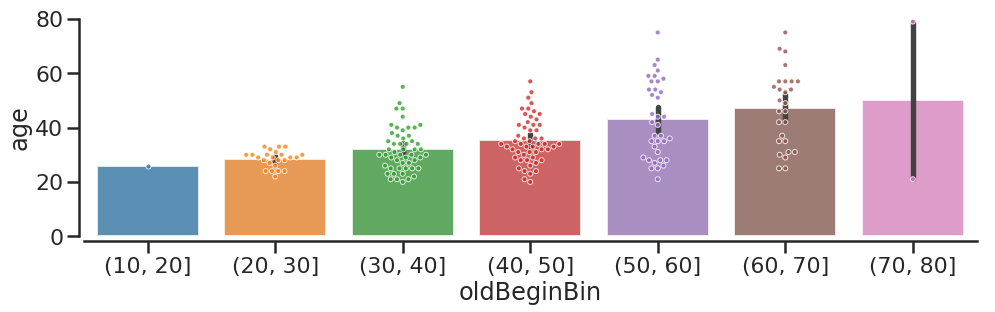

In [22]:
plt.figure(figsize=(16, 4))
sns.barplot(data=clean_df, x='oldBeginBin', y='age', alpha=0.8)
sns.swarmplot(
    data=clean_df,
    x='oldBeginBin',
    y='age',
    linewidth=1,
    edgecolor='white',
    alpha=0.8)
sns.despine(offset=5)
plt.ylim(0, 80)
plt.show()

## Modelling the data

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


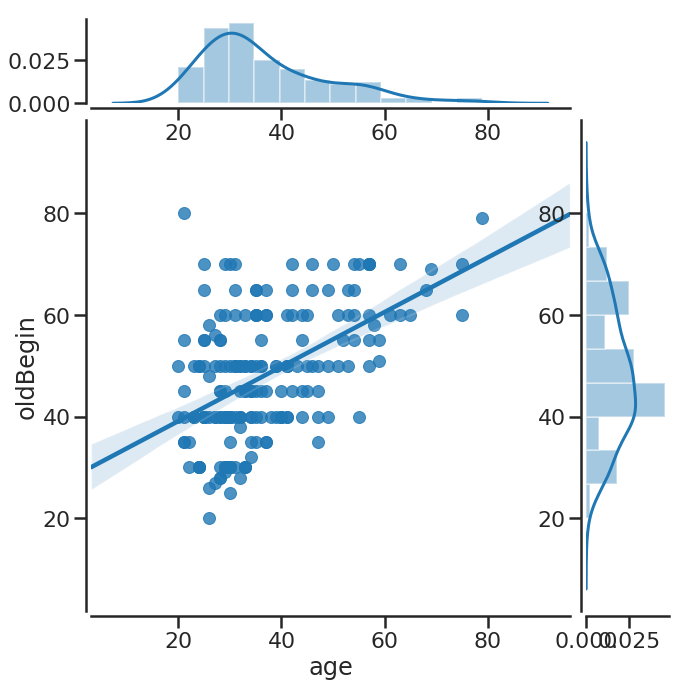

In [23]:
g = sns.jointplot("age", "oldBegin", data=clean_df, kind="reg", size=10)
sns.despine(offset=5)
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


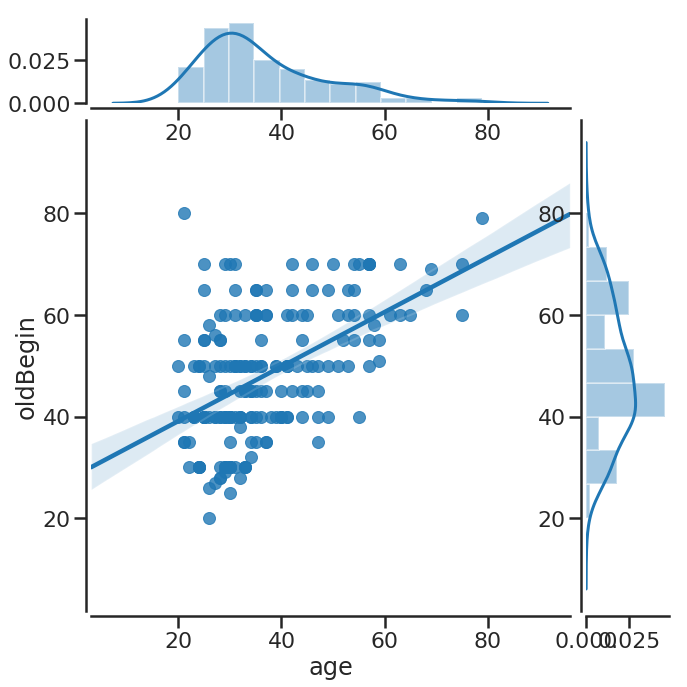

In [24]:
sns.jointplot("age", "oldBegin", data=clean_df, kind="reg", size=10)
sns.despine(offset=5)
plt.show()

In [25]:
from scipy import stats

In [26]:
slope, intercept, r, p, se = stats.linregress(clean_df.loc[:,'age'],clean_df.loc[:,'oldBegin'])

In [27]:
print(intercept,slope)

28.39384224904551 0.5361851416240945


/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


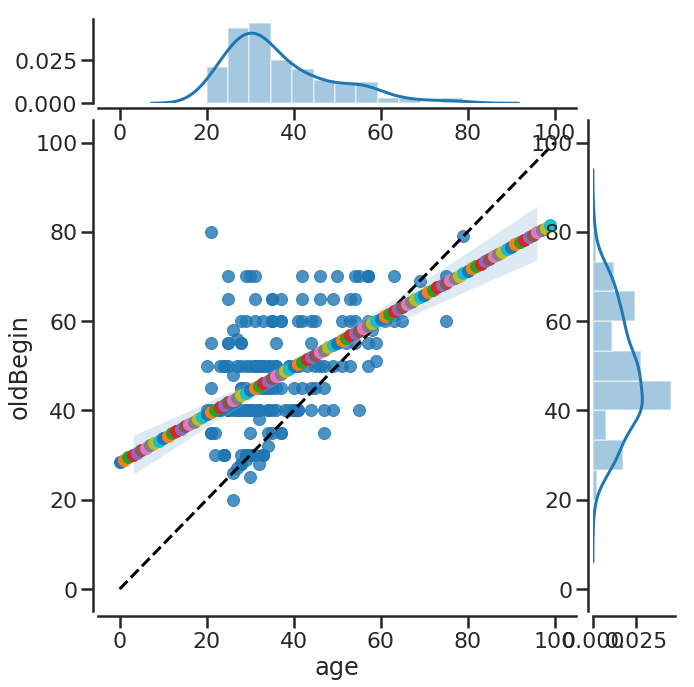

In [28]:
sns.jointplot("age", "oldBegin", data=clean_df, kind="reg", size=10)
sns.despine(offset=5)
plt.plot([0, 100], [0, 100], linestyle='dashed', color='k')
for x in range(100):
    plt.plot(x,(intercept+slope*x),'o')
plt.show()

### Fit linear regression line

In [29]:
def linear(x, a, b):
    y = a + b * x
    return y

In [30]:
def fitFunc(x, y, func):
    (intercept, slope), pcov = curve_fit(func, x, y)
    return intercept, slope

In [31]:
x = clean_df.loc[:, 'age']
y = clean_df.loc[:, 'oldBegin']

In [32]:
intercept, slope = fitFunc(x, y, linear)

In [33]:
intercept,slope

(28.39384224910524, 0.5361851416230833)

In [34]:
def plot_observer_func(x):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.regplot("age", "oldBegin", data=clean_df, ax=ax)

    a = intercept
    b = slope
    y = a + b * x
    plt.plot(x, y, 'o', label=r'$%.0f+%.2f*%.0f=%.0f$' % (a, b, x, y))

    plt.legend()
    sns.despine(trim=True, offset=5)
    plt.show()
    return y

#### What age do 20-year old people consider "old"?

In [35]:
observer_age = 20

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


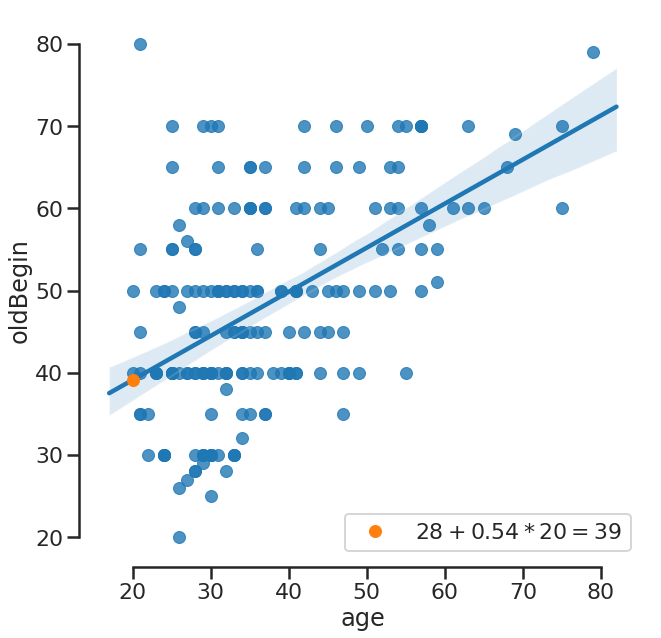

In [36]:
old_age_begin = plot_observer_func(observer_age)

Answer: {{ '%0.f'%observer_age }}-year old people consider {{ '%0.f'%old_age_begin }} and above to be "old" (on average)

In [37]:
i = interact(plot_observer_func, x=(1, 90))

interactive(children=(IntSlider(value=45, description='x', max=90, min=1), Output()), _dom_classes=('widget-in…

In [38]:
def plot_observed_func(y):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.regplot("age", "oldBegin", data=clean_df, ax=ax)

    a = intercept
    b = slope

    x = (y - a) / b
    plt.plot(
        x, y, 'o', label=r'$\frac{(%.0f-%.0f)}{%.2f}=%.0f$' % (y, a, b, x))

    plt.legend()
    sns.despine(trim=True, offset=5)
    plt.show()
    return x

#### Who considers 33 to be old (on average)?

In [39]:
observed_age = 33

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


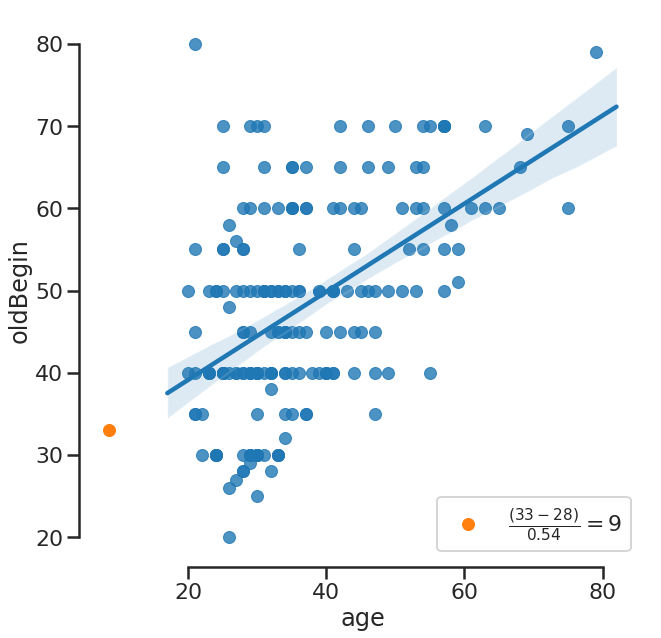

In [40]:
observer_say_old = plot_observed_func(observed_age)

Answer: {{ '%0.f'%observed_age }}-year old people are considered old by people {{ '%0.f'%observer_say_old }} and younger (on average).

In [41]:
i = interact(plot_observed_func, y=(10, 90))

interactive(children=(IntSlider(value=50, description='y', max=90, min=10), Output()), _dom_classes=('widget-i…

### compare to identity

In [42]:
intercept, slope = fitFunc(x, y, linear)
intercept, slope

(28.39384224910524, 0.5361851416230833)

In [43]:
pred_df = pd.DataFrame([[x, intercept + x * slope, x] for x in range(100)])
pred_df.columns = ['age', 'predictBeginOld', 'identity']

In [44]:
pred_df.tail()

,age,predictBeginOld,identity
95,95,79.331431,95
96,96,79.867616,96
97,97,80.403801,97
98,98,80.939986,98
99,99,81.476171,99


In [45]:
pred_df.loc[:,'diff']=pred_df.loc[:,'predictBeginOld']-pred_df.loc[:,'identity']

In [46]:
pred_df.tail()

,age,predictBeginOld,identity,diff
95,95,79.331431,95,-15.668569
96,96,79.867616,96,-16.132384
97,97,80.403801,97,-16.596199
98,98,80.939986,98,-17.060014
99,99,81.476171,99,-17.523829


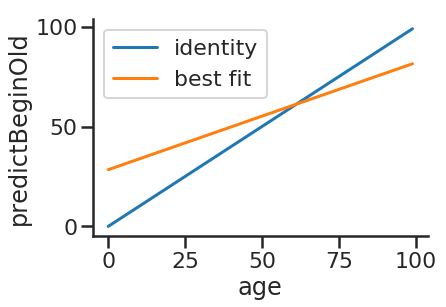

In [47]:
sns.lineplot(data=pred_df, x='age', y='identity', label='identity')
sns.lineplot(data=pred_df, x='age', y='predictBeginOld', label='best fit')

sns.despine()
plt.legend()
plt.show()

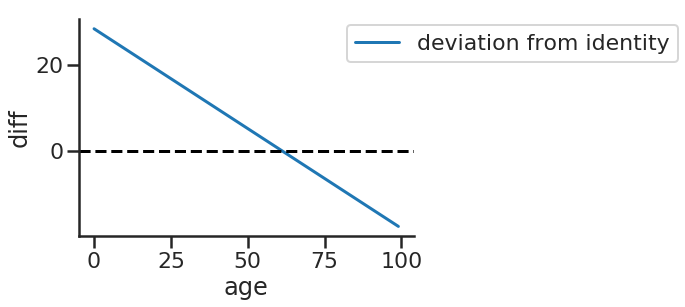

In [48]:
sns.lineplot(data=pred_df, x='age', y='diff', label='deviation from identity')
plt.legend(loc=(0.8, 0.8))
plt.axhline(0, color='k', linestyle='dashed')
sns.despine()
plt.show()

In [49]:
clean_df.loc[:,'deviationFromIdentity'] = clean_df.loc[:,'oldBegin']-clean_df.loc[:,'age']

In [50]:
clean_df.tail()

,ageFeel,oldBegin,oldReally,age,gender,numChild,ageBin,oldBeginBin,deviationFromIdentity
190,5,50,80,23,female,1,"(20, 30]","(40, 50]",27
191,4,50,60,49,male,2,"(40, 50]","(40, 50]",1
192,3,70,100,55,female,5,"(50, 60]","(60, 70]",15
193,5,69,80,69,male,3,"(60, 70]","(60, 70]",0
194,5,40,60,41,male,0,"(40, 50]","(30, 40]",-1


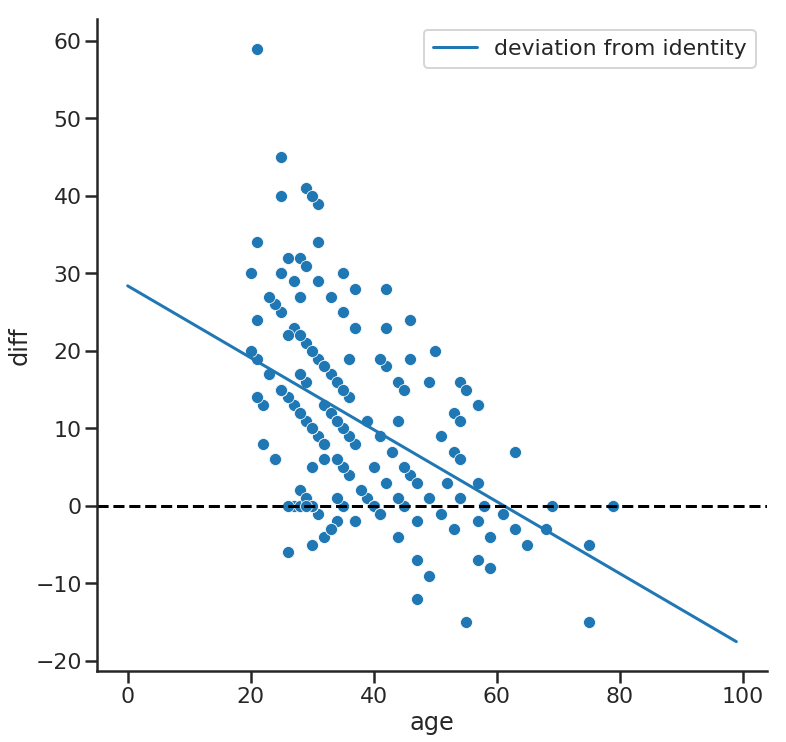

In [51]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=clean_df, x='age', y='deviationFromIdentity')
sns.lineplot(data=pred_df, x='age', y='diff', label='deviation from identity')
plt.axhline(0, color='k', linestyle='dashed')
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


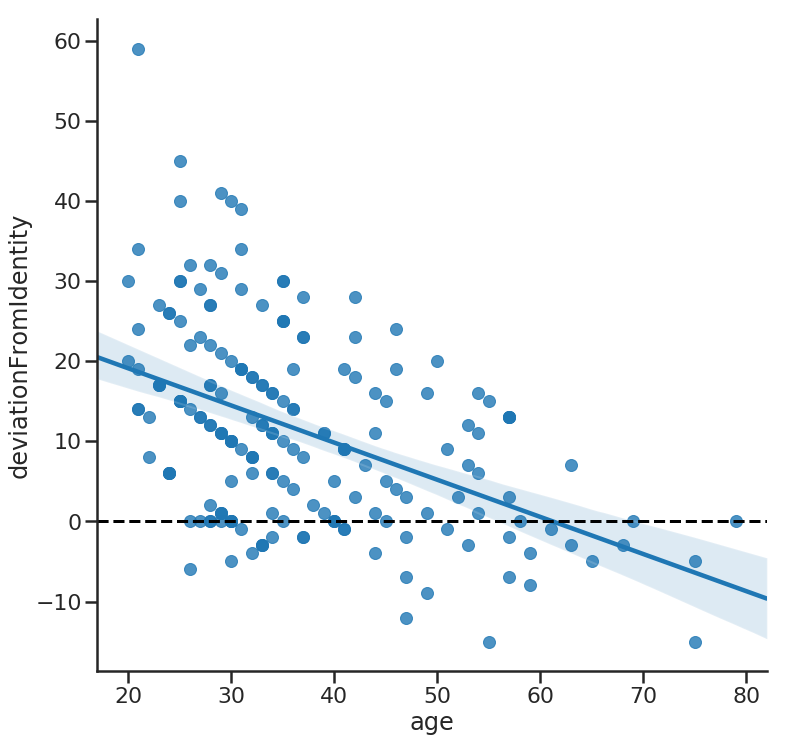

In [52]:
plt.figure(figsize=(12, 12))
sns.regplot(data=clean_df, x='age', y='deviationFromIdentity')
plt.axhline(0, color='k', linestyle='dashed')
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


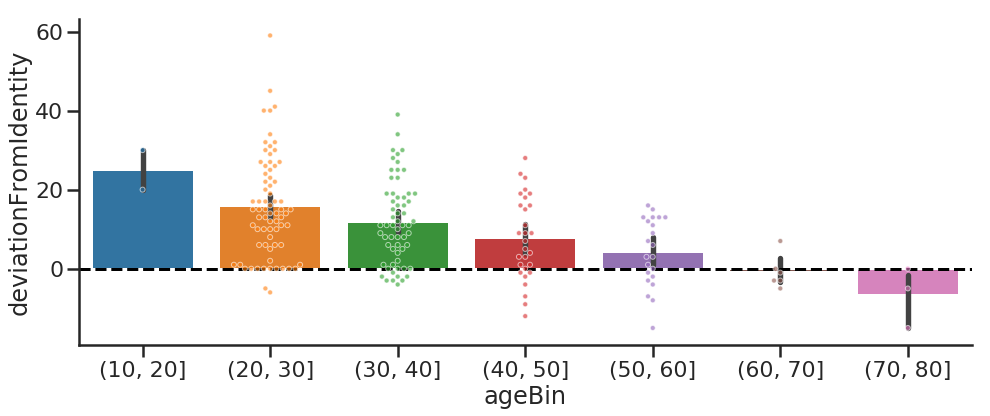

In [53]:
plt.figure(figsize=(16, 6))
sns.barplot(data=clean_df, x='ageBin', y='deviationFromIdentity')
sns.swarmplot(
    data=clean_df,
    x='ageBin',
    y='deviationFromIdentity',
    edgecolor='white',
    linewidth=1,
    alpha=0.6)
plt.axhline(0, color='k', linestyle='dashed')
sns.despine()
plt.show()

In [54]:
x = clean_df.loc[:, 'age']
y = clean_df.loc[:, 'deviationFromIdentity']

In [55]:
intercept, slope = fitFunc(x, y, linear)
intercept, slope

(28.39384224910524, -0.4638148583790982)

In [56]:
def plot_deviation_age_func(x):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.regplot("age", "deviationFromIdentity", data=clean_df, ax=ax)

    a = intercept
    b = slope
    y = a + b * x
    plt.plot(x, y, 'o', label=r'$%.0f+%.2f*%.0f=%.0f$' % (a, b, x, y))

    plt.legend()
    sns.despine(trim=True, offset=5)
    plt.show()
    return y

#### How much older than their own age do you have to be to be considered old by a 20-year old?

In [57]:
observer_age

20

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


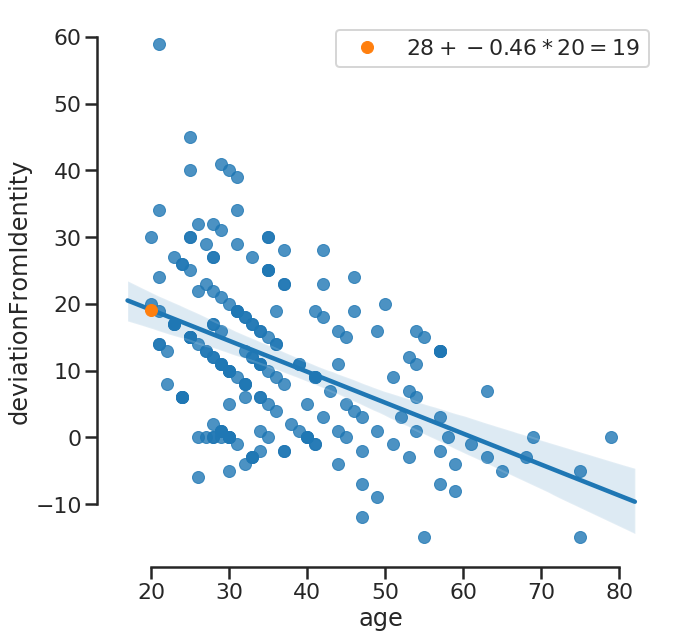

In [58]:
older_than_observer = plot_deviation_age_func(observer_age)

Answer: You have to be {{ '%0.f'%older_than_observer }} years older than the {{ '%0.f'%observer_age }}-year olds to be considered old.

In [59]:
def plot_deviation_mag_func(y):

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.regplot("age", "deviationFromIdentity", data=clean_df, ax=ax)

    a = intercept
    b = slope

    x = (y - a) / b
    plt.plot(
        x, y, 'o', label=r'$\frac{(%.0f-%.0f)}{%.2f}=%.0f$' % (y, a, b, x))

    plt.legend()
    sns.despine(trim=True, offset=5)
    plt.show()
    return x

#### Who considers people 19 years older than themselves to be old?

In [60]:
magnitude_of_deviation = 19

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


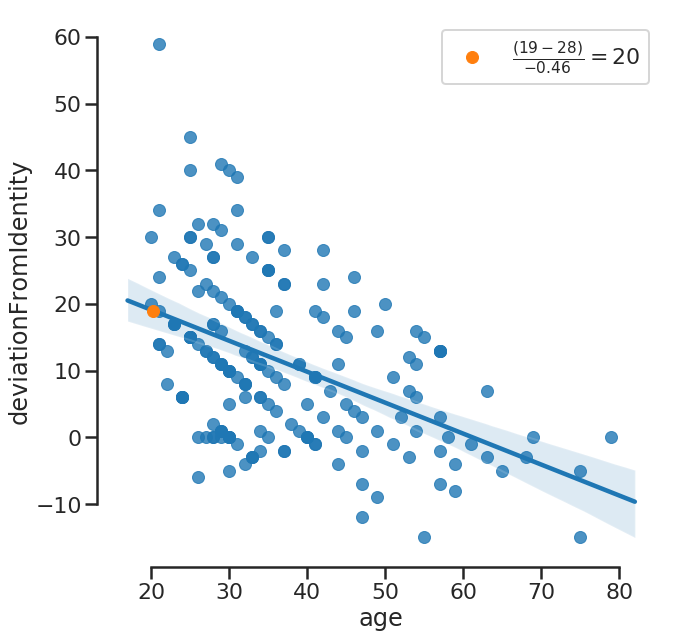

In [61]:
age_of_observer = plot_deviation_mag_func(magnitude_of_deviation)

Answer: {{ '%0.f'%age_of_observer }}-year olds consider people {{ '%0.f'%magnitude_of_deviation }} years older than themselves to be old.

## counting proportions

In [62]:
stack_df = clean_df.groupby(['age','oldBegin']).count().mode(axis=1).unstack().fillna(0)[0]

In [63]:
stack_df.tail()

oldBegin,20,25,26,27,28,29,30,32,35,38,...,51,55,56,58,60,65,69,70,79,80
age,,,,,,,,,,,,,,,,,,,,,
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
stack_percent_df = ((stack_df.T/stack_df.sum(axis=1)).fillna(0)*100).T
stack_cum_df = stack_percent_df.cumsum(axis=1)

In [65]:
stack_cum_df.tail()

oldBegin,20,25,26,27,28,29,30,32,35,38,...,51,55,56,58,60,65,69,70,79,80
age,,,,,,,,,,,,,,,,,,,,,
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50.0,50.0,50.0,100.0,100.0,100.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0


Fill in missing values

In [66]:
empty_df = pd.DataFrame(index=stack_cum_df.index,columns=range(20,81))
empty_df.index.names = stack_cum_df.index.names
empty_df.columns.names = stack_cum_df.columns.names

In [67]:
interpolate_df = empty_df.add(stack_cum_df,fill_value=0).astype(float)
interpolate_df = interpolate_df.interpolate(axis=1)

In [68]:
interpolate_df.tail()

oldBegin,20,21,22,23,24,25,26,27,28,29,...,71,72,73,74,75,76,77,78,79,80
age,,,,,,,,,,,,,,,,,,,,,
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.111111,22.222222,33.333333,44.444444,55.555556,66.666667,77.777778,88.888889,100.0,100.0


In [69]:
empty_df = pd.DataFrame(index=range(20,81),columns=interpolate_df.columns)
empty_df.index.names = interpolate_df.index.names
empty_df.columns.names = interpolate_df.columns.names

In [70]:
interpolate_df = empty_df.add(interpolate_df,fill_value=0).astype(float)
interpolate_df = interpolate_df.interpolate(axis=0)

In [71]:
interpolate_df.tail()

oldBegin,20,21,22,23,24,25,26,27,28,29,...,71,72,73,74,75,76,77,78,79,80
age,,,,,,,,,,,,,,,,,,,,,
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77.777778,80.555556,83.333333,86.111111,88.888889,91.666667,94.444444,97.222222,100.0,100.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.555556,61.111111,66.666667,72.222222,77.777778,83.333333,88.888889,94.444444,100.0,100.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.333333,41.666667,50.000000,58.333333,66.666667,75.000000,83.333333,91.666667,100.0,100.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.111111,22.222222,33.333333,44.444444,55.555556,66.666667,77.777778,88.888889,100.0,100.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.111111,22.222222,33.333333,44.444444,55.555556,66.666667,77.777778,88.888889,100.0,100.0


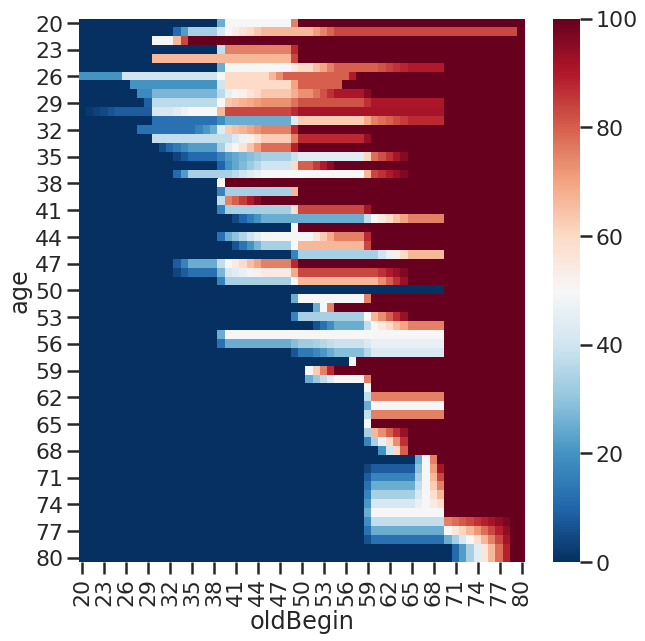

In [72]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(interpolate_df,vmin=0,vmax=100,cmap='RdBu_r',ax=ax)
plt.show()

### make smooth by averaging over 5 observations

In [73]:
smooth_df = interpolate_df.rolling(5,axis=0).mean().rolling(5,axis=1).mean()

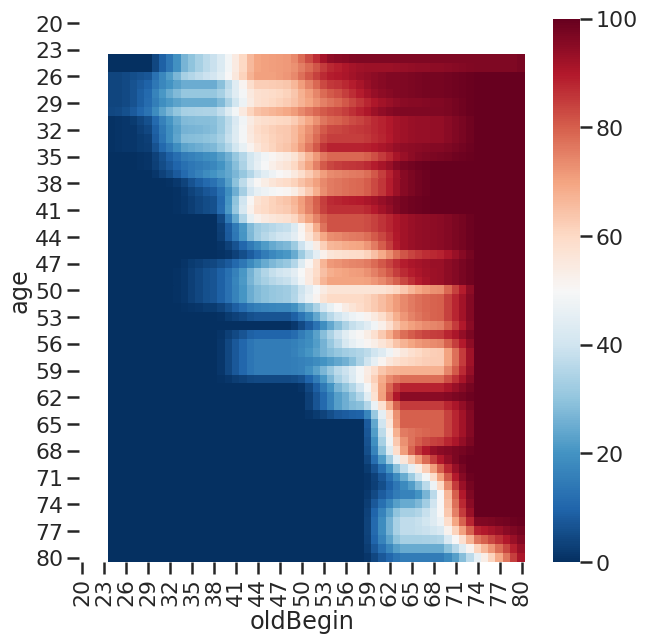

In [75]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(smooth_df,vmin=0,vmax=100,cmap='RdBu_r',ax=ax)
plt.show()

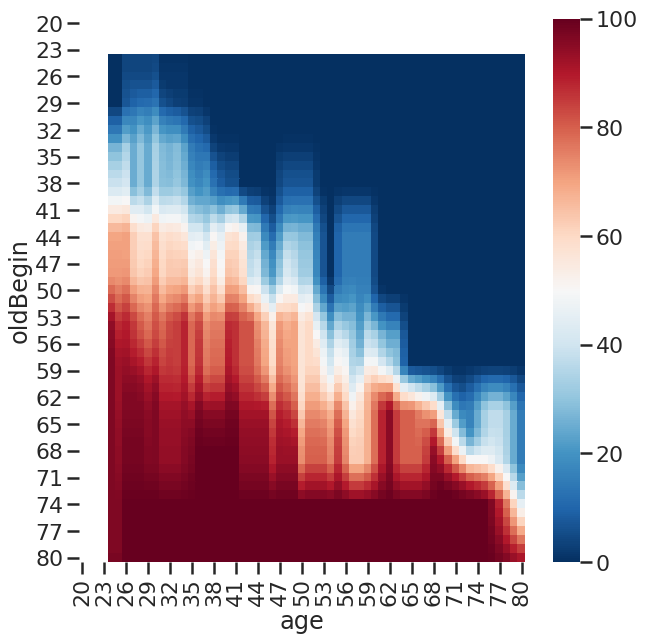

In [76]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(smooth_df.T,vmin=0,vmax=100,cmap='RdBu_r',ax=ax)
plt.show()

Reshape table into long format

In [77]:
sns_df = pd.DataFrame( smooth_df.stack() )
sns_df.columns = ['percentOld']
sns_df.loc[:,'age'] = sns_df.index.get_level_values(0)
sns_df.loc[:,'oldBegin'] = sns_df.index.get_level_values(1)

In [78]:
sns_df.tail()

percentOld  age  oldBegin
age oldBegin                           
80  76         61.111111   80        76
    77         68.888889   80        77
    78         76.666667   80        78
    79         84.444444   80        79
    80         90.666667   80        80

#### Make lineplots

In [79]:
sns_df.loc[:,'fifty'] = [[np.nan,x][x<50] for x in sns_df.loc[:,'percentOld']]

In [80]:
sns_df

percentOld  age  oldBegin         fifty
age oldBegin                                           
24  24        0.000000e+00   24        24  0.000000e+00
    25        0.000000e+00   24        25  0.000000e+00
    26        0.000000e+00   24        26  0.000000e+00
    27        0.000000e+00   24        27  0.000000e+00
    28        0.000000e+00   24        28  0.000000e+00
    29        0.000000e+00   24        29  0.000000e+00
    30        4.666667e+00   24        30  4.666667e+00
    31        9.333333e+00   24        31  9.333333e+00
    32        1.400000e+01   24        32  1.400000e+01
    33        1.977778e+01   24        33  1.977778e+01
    34        2.666667e+01   24        34  2.666667e+01
    35        3.000000e+01   24        35  3.000000e+01
    36        3.333333e+01   24        36  3.333333e+01
    37        3.666667e+01   24        37  3.666667e+01
    38        3.888889e+01   24        38  3.888889e+01
    39        4.283333e+01   24        39  4.283333e+01
    40        4.850000e+01   24        40  4.850000e+01
    41        5.430000e+01   24        41           NaN
    42        6.023333e+01   24        42           NaN
    43        6.630000e+01   24        43           NaN
    44        6.966667e+01   24        44           NaN
    45        7.033333e+01   24        45           NaN
    46        7.086667e+01   24        46           NaN
    47        7.126667e+01   24        47           NaN
    48        7.153333e+01   24        48           NaN
    49        7.383333e+01   24        49           NaN
    50        7.816667e+01   24        50           NaN
    51        8.250000e+01   24        51           NaN
    52        8.700000e+01   24        52           NaN
    53        9.166667e+01   24        53           NaN
...                    ...  ...       ...           ...
80  51        5.968559e-15   80        51  5.968559e-15
    52        5.968559e-15   80        52  5.968559e-15
    53        8.810730e-15   80        53  8.810730e-15
    54        1.108447e-14   80        54  1.108447e-14
    55        1.080025e-14   80        55  1.080025e-14
    56        9.663381e-15   80        56  9.663381e-15
    57        1.193712e-14   80        57  1.193712e-14
    58        1.136868e-14   80        58  1.136868e-14
    59        1.500000e+00   80        59  1.500000e+00
    60        4.500000e+00   80        60  4.500000e+00
    61        7.500000e+00   80        61  7.500000e+00
    62        1.050000e+01   80        62  1.050000e+01
    63        1.350000e+01   80        63  1.350000e+01
    64        1.500000e+01   80        64  1.500000e+01
    65        1.500000e+01   80        65  1.500000e+01
    66        1.500000e+01   80        66  1.500000e+01
    67        1.500000e+01   80        67  1.500000e+01
    68        1.500000e+01   80        68  1.500000e+01
    69        1.500000e+01   80        69  1.500000e+01
    70        1.800000e+01   80        70  1.800000e+01
    71        2.255556e+01   80        71  2.255556e+01
    72        2.866667e+01   80        72  2.866667e+01
    73        3.633333e+01   80        73  3.633333e+01
    74        4.555556e+01   80        74  4.555556e+01
    75        5.333333e+01   80        75           NaN
    76        6.111111e+01   80        76           NaN
    77        6.888889e+01   80        77           NaN
    78        7.666667e+01   80        78           NaN
    79        8.444444e+01   80        79           NaN
    80        9.066667e+01   80        80           NaN

[3249 rows x 4 columns]

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


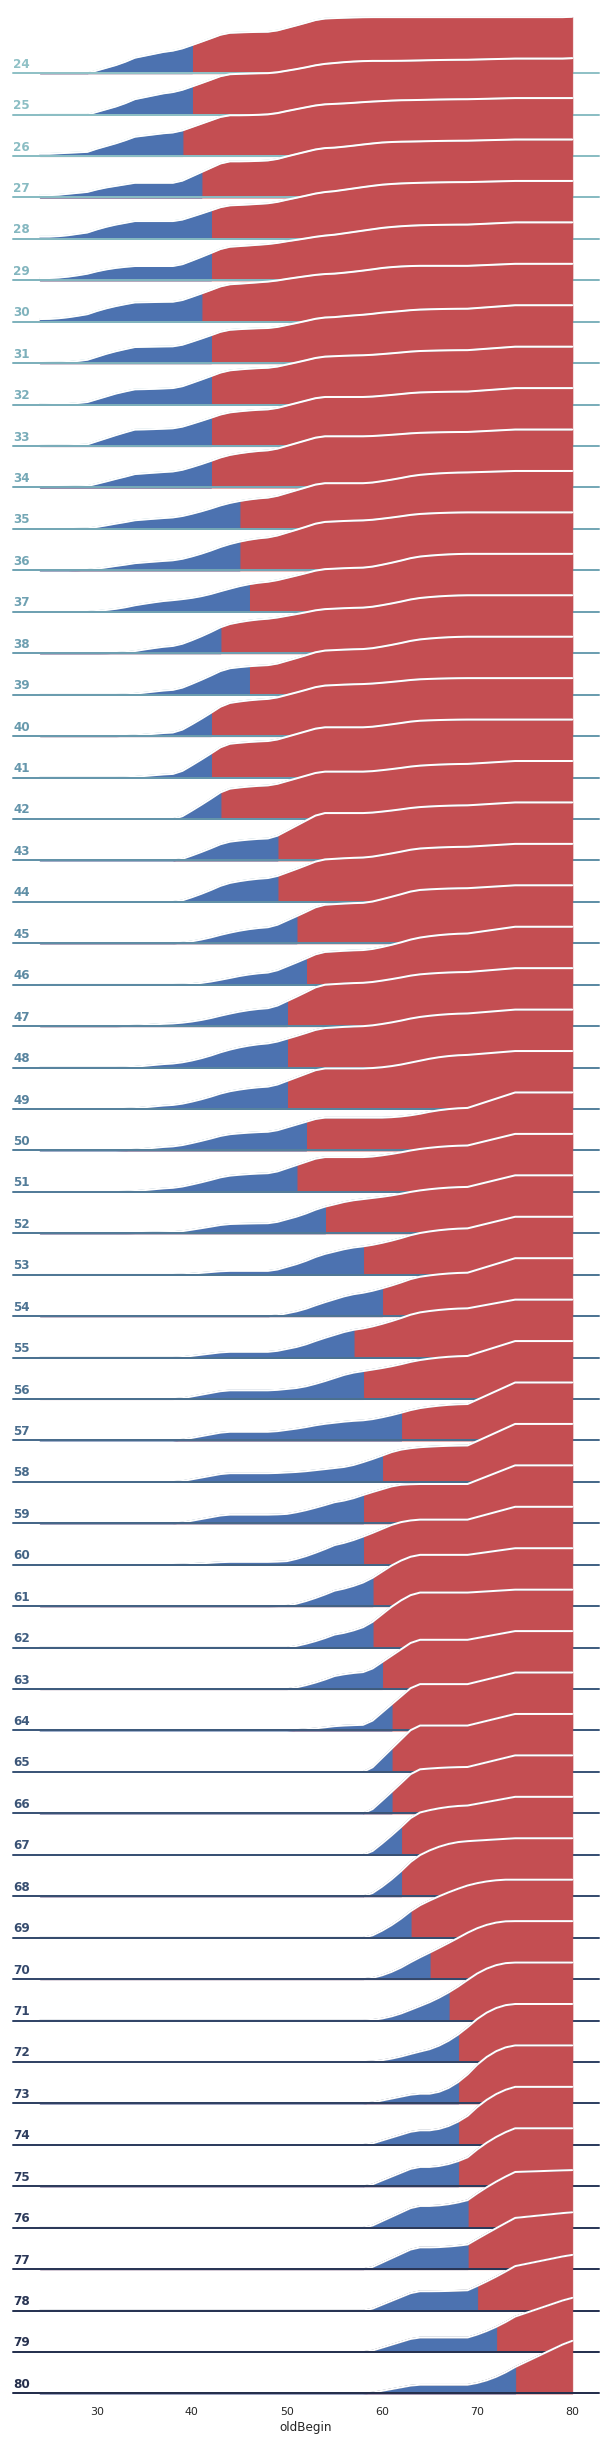

In [81]:
# modified from https://seaborn.pydata.org/examples/kde_ridgeplot.html
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

n_groups = sns_df.index.levels[0].shape[-1]
# Initializ5 the FacetGrid object
pal = sns.cubehelix_palette(n_groups, rot=-.25, light=.7)

g = sns.FacetGrid(
    sns_df, row="age", hue="age", aspect=15, height=.6, palette=pal)
# Draw the densities in a few steps
g.map(sns.lineplot, "oldBegin", "percentOld", clip_on=False, alpha=1, lw=1.5)
g.map(sns.lineplot, "oldBegin", "percentOld", clip_on=False, color="w", lw=2)
g.map(plt.fill_between,"oldBegin", "percentOld", color='r')
g.map(plt.fill_between,"oldBegin","fifty", color='b')
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        .2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes)

g.map(label, "oldBegin")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.35)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


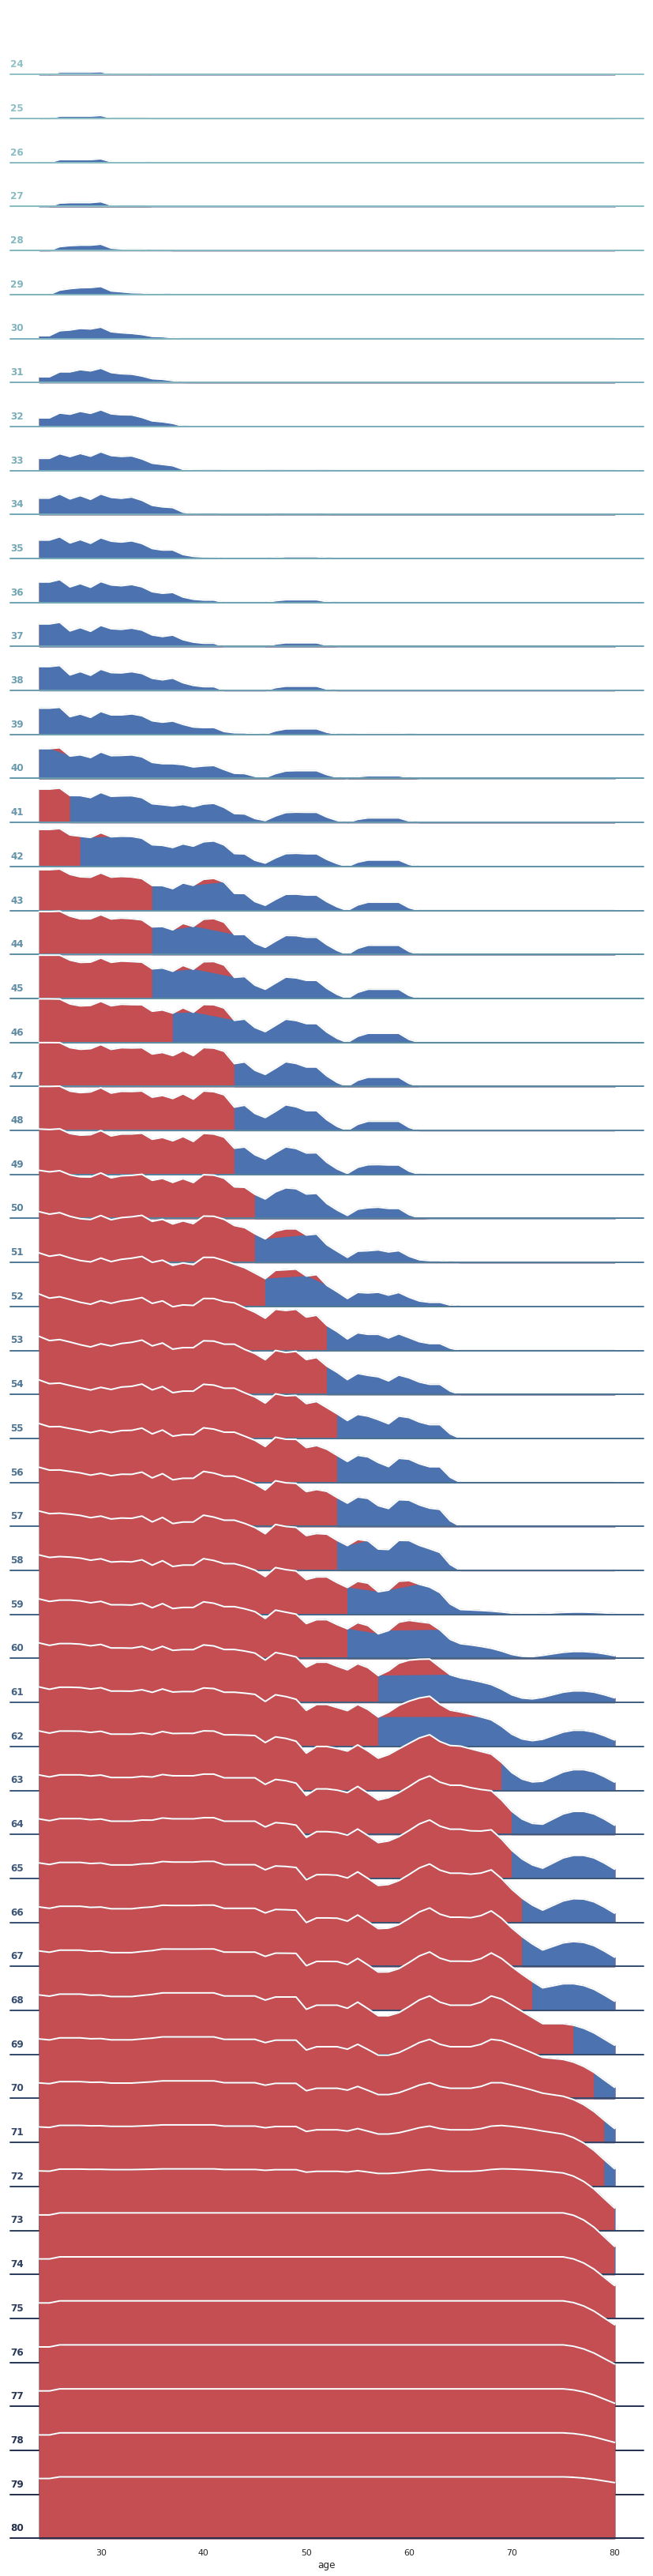

In [82]:
# modified from https://seaborn.pydata.org/examples/kde_ridgeplot.html

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

n_groups = sns_df.index.levels[1].shape[-1]
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(n_groups, rot=-.25, light=.7)

g = sns.FacetGrid(
    sns_df, row="oldBegin", hue="oldBegin", aspect=15, height=.8, palette=pal)
# Draw the densities in a few steps
g.map(sns.lineplot, "age", "percentOld", clip_on=False, alpha=1, lw=1.5)
g.map(plt.fill_between, "age", "percentOld")
g.map(sns.lineplot, "age", "percentOld", clip_on=False, color="w", lw=2)
g.map(plt.fill_between,"age", "percentOld", color='r')
g.map(plt.fill_between,"age","fifty", color='b')
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        .2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes)

g.map(label, "age")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.35)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

## counting proportions II: 10-year bins

In [83]:
num_df = pd.DataFrame(
    clean_df.groupby(['ageBin', 'oldBeginBin']).count().loc[:, 'age']).copy()

In [84]:
num_df.tail()

age
ageBin   oldBeginBin     
(70, 80] (30, 40]     NaN
         (40, 50]     NaN
         (50, 60]     1.0
         (60, 70]     1.0
         (70, 80]     1.0

In [85]:
num_df = num_df.unstack().T.loc['age', :]

In [86]:
num_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",NaN,1.0,NaN,NaN,NaN,NaN,NaN
"(20, 30]",NaN,19.0,5.0,NaN,NaN,NaN,NaN
"(30, 40]",1.0,25.0,19.0,6.0,1.0,NaN,NaN
"(40, 50]",1.0,13.0,24.0,12.0,3.0,NaN,NaN
"(50, 60]",NaN,9.0,8.0,5.0,10.0,3.0,1.0
"(60, 70]",NaN,4.0,5.0,6.0,8.0,3.0,1.0
"(70, 80]",NaN,1.0,NaN,NaN,NaN,NaN,1.0


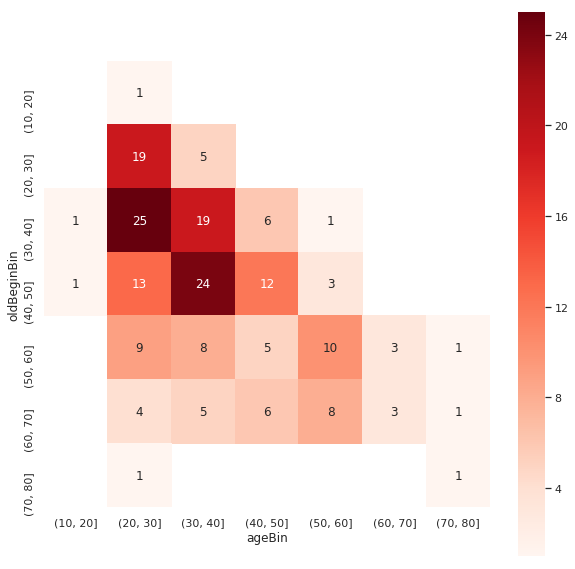

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(num_df, square=True, annot=True, cmap='Reds')
plt.show()

In [88]:
num_df.sum(axis=0)

ageBin
(10, 20]     2.0
(20, 30]    72.0
(30, 40]    61.0
(40, 50]    29.0
(50, 60]    22.0
(60, 70]     6.0
(70, 80]     3.0
dtype: float64

In [89]:
percent_df = ((num_df / num_df.sum(axis=0)) * 100).T.copy()

In [90]:
percent_df

oldBeginBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ageBin,,,,,,,
"(10, 20]",NaN,NaN,50.000000,50.000000,NaN,NaN,NaN
"(20, 30]",1.388889,26.388889,34.722222,18.055556,12.500000,5.555556,1.388889
"(30, 40]",NaN,8.196721,31.147541,39.344262,13.114754,8.196721,NaN
"(40, 50]",NaN,NaN,20.689655,41.379310,17.241379,20.689655,NaN
"(50, 60]",NaN,NaN,4.545455,13.636364,45.454545,36.363636,NaN
"(60, 70]",NaN,NaN,NaN,NaN,50.000000,50.000000,NaN
"(70, 80]",NaN,NaN,NaN,NaN,33.333333,33.333333,33.333333


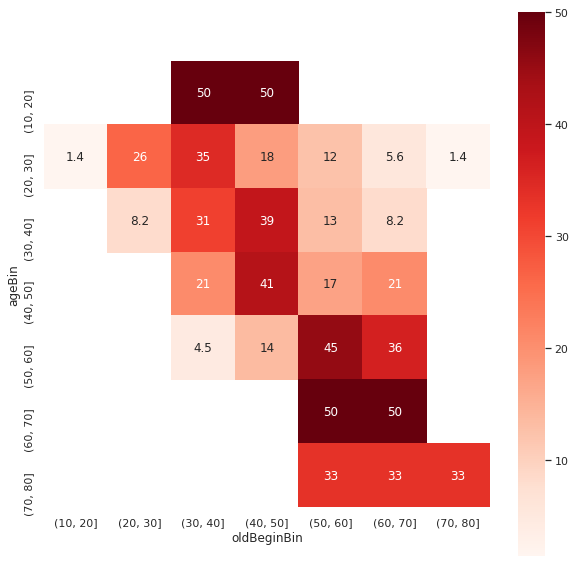

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(percent_df,square=True,annot=True,cmap='Reds')
plt.show()

In [92]:
percent_df

oldBeginBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ageBin,,,,,,,
"(10, 20]",NaN,NaN,50.000000,50.000000,NaN,NaN,NaN
"(20, 30]",1.388889,26.388889,34.722222,18.055556,12.500000,5.555556,1.388889
"(30, 40]",NaN,8.196721,31.147541,39.344262,13.114754,8.196721,NaN
"(40, 50]",NaN,NaN,20.689655,41.379310,17.241379,20.689655,NaN
"(50, 60]",NaN,NaN,4.545455,13.636364,45.454545,36.363636,NaN
"(60, 70]",NaN,NaN,NaN,NaN,50.000000,50.000000,NaN
"(70, 80]",NaN,NaN,NaN,NaN,33.333333,33.333333,33.333333


In [93]:
cum_percent_df = percent_df.fillna(0).cumsum(axis=1).T.copy()

In [94]:
cum_percent_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",0.0,1.388889,0.000000,0.000000,0.000000,0.0,0.000000
"(20, 30]",0.0,27.777778,8.196721,0.000000,0.000000,0.0,0.000000
"(30, 40]",50.0,62.500000,39.344262,20.689655,4.545455,0.0,0.000000
"(40, 50]",100.0,80.555556,78.688525,62.068966,18.181818,0.0,0.000000
"(50, 60]",100.0,93.055556,91.803279,79.310345,63.636364,50.0,33.333333
"(60, 70]",100.0,98.611111,100.000000,100.000000,100.000000,100.0,66.666667
"(70, 80]",100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.000000


In [95]:
round_df = np.round(cum_percent_df, 0).astype(int)
round_df

ageBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
oldBeginBin,,,,,,,
"(10, 20]",0,1,0,0,0,0,0
"(20, 30]",0,28,8,0,0,0,0
"(30, 40]",50,62,39,21,5,0,0
"(40, 50]",100,81,79,62,18,0,0
"(50, 60]",100,93,92,79,64,50,33
"(60, 70]",100,99,100,100,100,100,67
"(70, 80]",100,100,100,100,100,100,100


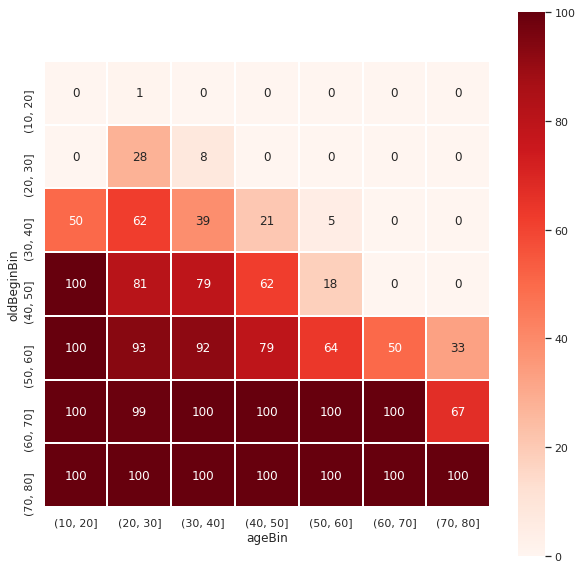

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(
    round_df,
    square=True,
    annot=True,
    cmap='Reds',
    vmin=0,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    ax=ax)

plt.show()

In [97]:
round_df.index = ['%s-%syrs' % (x.left, x.right) for x in round_df.index]
round_df.columns = ['%s-%syrs' % (x.left, x.right) for x in round_df.columns]

round_df.index.names = ['your age']
round_df.columns.names = ['age of people rating you']

In [98]:
sns.set_context('poster')
sns.set_style('ticks')

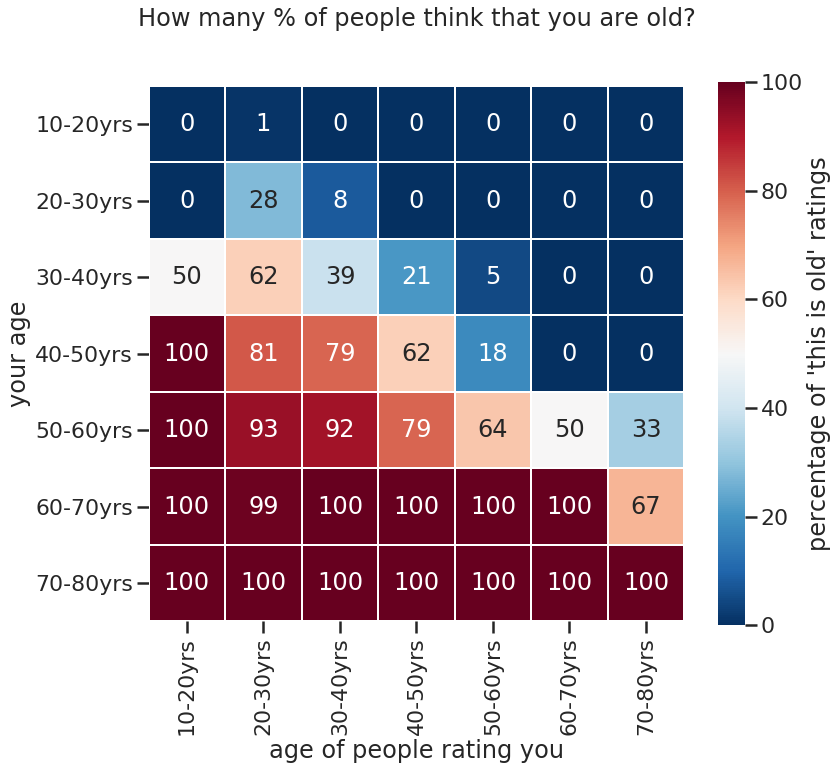

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(
    round_df,
    square=True,
    annot=True,
    cmap='RdBu_r',
    vmin=0,
    vmax=100,
    linewidths=1,
    fmt='.3g',
    cbar_kws={"label": "percentage of 'this is old' ratings"},
    ax=ax)

plt.title('How many % of people think that you are old?', fontsize=24, y=1.1)
plt.show()